# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')

In [5]:
# Extract the table
table = soup.find('table', class_='table')

# Extract all rows of data
rows = table.find_all('tr')


### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Get headers
headings = [head.text.strip() for head in table.find_all('th')]

# Create an empty list
weather_data_ls = []

# Loop through each row (skipping the header)
for row in rows[1:]: 
    data = row.find_all('td')
    # Extract text from each cell
    row_data = [dt.text.strip() for dt in data]
    
    # Create a dictionary for the current row
    if len(row_data) == len(headings):
        weather_dict = {headings[i]: row_data[i] for i in range(len(headings))}
        weather_data_ls.append(weather_dict)

# Print the extracted data
print(weather_data_ls)

[{'id': '2', 'terrestrial_date': '2012-08-16', 'sol': '10', 'ls': '155', 'month': '6', 'min_temp': '-75.0', 'pressure': '739.0'}, {'id': '13', 'terrestrial_date': '2012-08-17', 'sol': '11', 'ls': '156', 'month': '6', 'min_temp': '-76.0', 'pressure': '740.0'}, {'id': '24', 'terrestrial_date': '2012-08-18', 'sol': '12', 'ls': '156', 'month': '6', 'min_temp': '-76.0', 'pressure': '741.0'}, {'id': '35', 'terrestrial_date': '2012-08-19', 'sol': '13', 'ls': '157', 'month': '6', 'min_temp': '-74.0', 'pressure': '732.0'}, {'id': '46', 'terrestrial_date': '2012-08-20', 'sol': '14', 'ls': '157', 'month': '6', 'min_temp': '-74.0', 'pressure': '740.0'}, {'id': '57', 'terrestrial_date': '2012-08-21', 'sol': '15', 'ls': '158', 'month': '6', 'min_temp': '-78.0', 'pressure': '740.0'}, {'id': '68', 'terrestrial_date': '2012-08-22', 'sol': '16', 'ls': '158', 'month': '6', 'min_temp': '-77.0', 'pressure': '740.0'}, {'id': '79', 'terrestrial_date': '2012-08-23', 'sol': '17', 'ls': '159', 'month': '6', 'mi

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
weather_df = pd.DataFrame(weather_data_ls)

In [8]:
# Confirm DataFrame was created successfully
weather_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
weather_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [10]:
# Change data types for data analysis
weather_df.sol = weather_df.sol.astype('int32') 
weather_df.ls = weather_df.ls.astype('int32')
weather_df.month = weather_df.month.astype('int32')
weather_df.min_temp = weather_df.min_temp.astype('float64')
weather_df.pressure = weather_df.pressure.astype('float64') 
weather_df.terrestrial_date = weather_df.terrestrial_date.astype('datetime64[ns]') 


In [11]:
# Confirm type changes were successful by examining data types again
weather_df.dtypes

id                          object
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
weather_df['month'].max()

12

In [13]:
# 2. How many sols (Martian days) worth of data are there?
len(weather_df['sol'])

1867

In [14]:
# 3. What is the average minimum temperature by month?
weather_df.groupby(weather_df['month'])['min_temp'].mean()

month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64

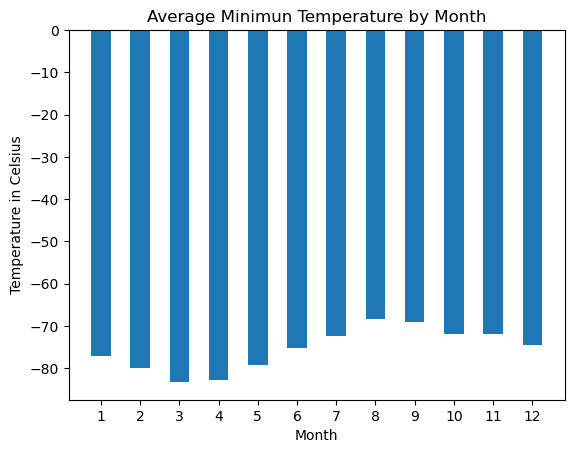

In [15]:
# Plot the average minimum temperature by month
avg_temp = weather_df.groupby(weather_df['month'])['min_temp'].mean()

plt.bar(avg_temp.index, avg_temp.values, width = 0.5 )
plt.title('Average Minimun Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.xticks(ticks=range(1, 13))
plt.show()

In [16]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph - sort data
avg_temp_sorted = avg_temp.sort_values()
avg_temp_sorted = pd.DataFrame(avg_temp_sorted)
avg_temp_df = avg_temp_sorted.reset_index().sort_values(by='min_temp')
avg_temp_df.month = avg_temp_df.month.astype('string')
avg_temp_df

,month,min_temp
0,3,-83.307292
1,4,-82.747423
2,2,-79.932584
3,5,-79.308725
4,1,-77.160920
5,6,-75.299320
6,12,-74.451807
7,7,-72.281690
8,11,-71.985507
9,10,-71.982143


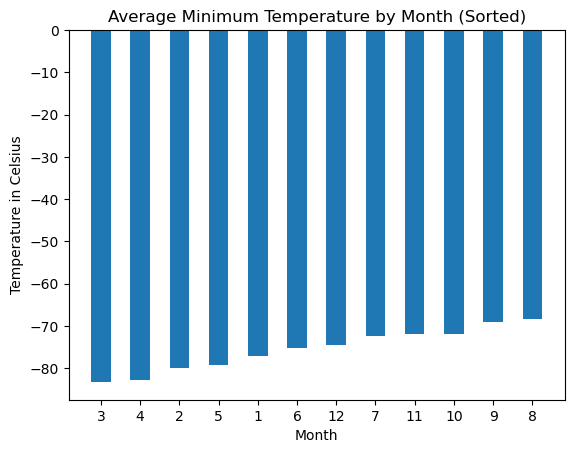

In [20]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph - plot
plt.bar('month', 'min_temp', data=avg_temp_df, width=0.5)
plt.title('Average Minimum Temperature by Month (Sorted)')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.xticks(ticks=range(0, 12))
plt.show()


In [22]:
# 4. What is the average pressure by month?
weather_df.groupby(weather_df['month'])['pressure'].mean()

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

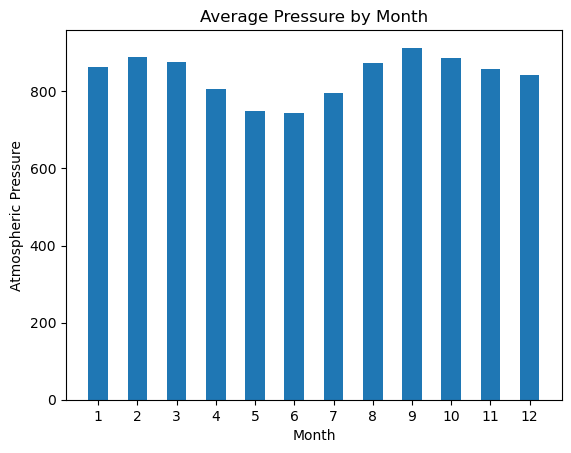

In [23]:
# Plot the average pressure by month
avg_pressure = weather_df.groupby(weather_df['month'])['pressure'].mean()

plt.bar(avg_pressure.index, avg_pressure.values, width = 0.5 )
plt.title('Average Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.xticks(ticks=range(1, 13))
plt.show()

In [40]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph - sort data
avg_pressure_sorted = avg_pressure.sort_values()
avg_pressure_sorted = pd.DataFrame(avg_pressure_sorted)
avg_pressure_df = avg_pressure_sorted.reset_index().sort_values(by='pressure')
avg_pressure_df.month = avg_pressure_df.month.astype('string')
avg_pressure_df

,month,pressure
0,6,745.054422
1,5,748.557047
2,7,795.105634
3,4,806.329897
4,12,842.156627
5,11,857.014493
6,1,862.488506
7,8,873.829787
8,3,877.322917
9,10,887.312500


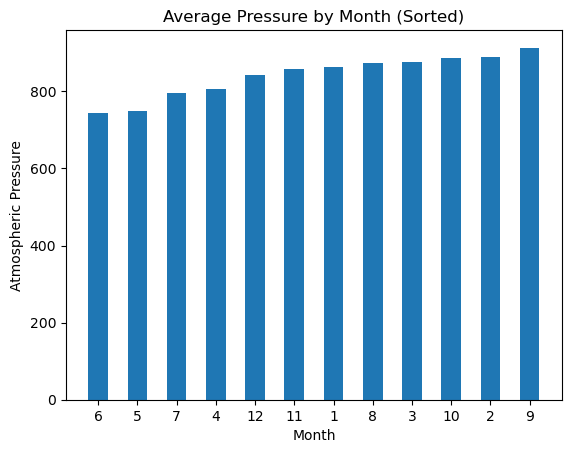

In [41]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph - plot
plt.bar('month', 'pressure', data=avg_pressure_df, width=0.5)
plt.title('Average Pressure by Month (Sorted)')
plt.xlabel('Month')
plt.ylabel('Atmospheric Pressure')
plt.xticks(ticks=range(0, 12))
plt.show()


1867
range(0, 1867)


<function matplotlib.pyplot.show(close=None, block=None)>

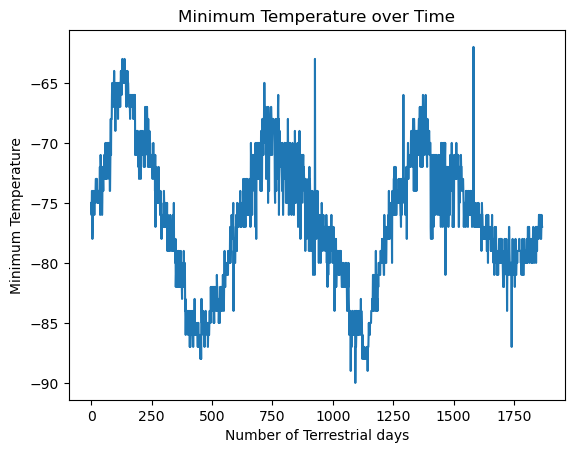

In [37]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
earth_days = len(weather_df['terrestrial_date'])
print(earth_days)
x_axis = range(0, 1867)
print(x_axis)

plt.plot(x_axis, weather_df['min_temp'])
plt.title("Minimum Temperature over Time")
plt.xlabel("Number of Terrestrial days")
plt.ylabel("Minimum Temperature")
plt.show

#### Minimum Temperature

The third Martian month experiences the lowest minimum temperature at -83.3°C. In contrast, the eighth Martian month has the highest minimum average temperature, which is -68.38°C.

#### Atmospheric Pressure

The sixth Martian month has the lowest atmospheric pressure, recorded at 745.0. In contrast, the ninth Martian month experiences the highest average pressure, which is 913.3.

#### Year Length

A year on Mars, measured in terrestrial days, spans 1867 days. This conclusion is based on the data collected by the Curiosity rover, which recorded the minimum temperature daily over this period on Mars.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [38]:
# Write the data to a CSV
weather_df.to_csv('weather_data.csv', index=False)

In [39]:
browser.quit()